# Feed Forward Loops

We're now going to use some of these tools to look at a class of network motifs, called Feed Forward Loops (FFLs), found in signaling and regulatory networks. FFLs involve interactions between three components, with the basic topology illustrated below. Depending on the signs of the edges (whether activating or repressing) we can classify FFLs as "coherent" or "incoherent." We'll take a look at an example of each class.

## A Coherent FFL

The most common type of coherent FFL is illustrated in the figure below.  In this system $X$ is an activator of $Y$ and both $X$ and $Y$ regulate the production of $Z$ with AND logic (i.e. both $X$ and $Y$ must be above particular thresholds in order to trigger the production of $Z$). 

![coherent ffl](http://people.duke.edu/~pm21/coherent-ffl.png)


Using our logic approximation framework we will model the coherent FFL network illustrated above as follows.

#### Gene Y:

\begin{eqnarray*}
Y = f(X) = \beta_y\ \Theta(X > K_{xy})
\\
\\
\frac{dY}{dt} = \beta_y\ \Theta(X > K_{xy}) - \alpha_{y}Y
\end{eqnarray*}    
    
    
    
#### Gene Z:

\begin{eqnarray*}
Z = g(X,Y) = \beta_z\ \Theta(X > K_{xz})\Theta(Y > K_{yz})
\\
\\
\frac{dZ}{dt} = \beta_z\ \Theta(X > K_{xz})\Theta(Y > K_{yz}) - \alpha_{z}Z
\end{eqnarray*}  

In [7]:
# import statements to make numeric and plotting functions available
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

In [8]:
## We'll specify the behavior of X as a series of pulse of different length
## so we'll define a function to generate pulses

def pulse(ontime, offtime,  ntimes, onval=1):
    if ontime >= offtime:
        raise Exception("Invalid on/off times.")
    signal = np.zeros(ntimes)
    signal[ontime:offtime] = onval
    return signal


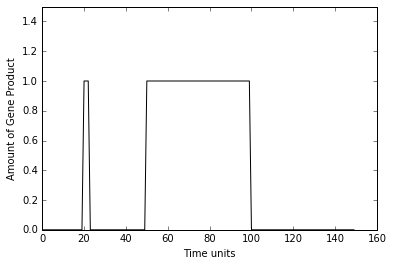

In [13]:
nsteps = 150
short_pulse = pulse(20, 23, nsteps)  # 5 sec pulse
long_pulse = pulse(50, 100, nsteps)  # 50 sec pulse
X = short_pulse + long_pulse  # we can then add the pulses to create
                              # a single time trace

plot(X, color='black')
xlabel('Time units')
ylabel('Amount of Gene Product')
ylim(0, 1.5)
pass

### Define Python functions for dY/dt and dZ/dt

Recall from above that

\begin{eqnarray*}
\frac{dY}{dt} & = & \beta_y\ \Theta(X > K_{xy}) - \alpha_{y}Y \\ \\
\frac{dZ}{dt} & = & \beta_z\ \Theta(X > K_{xz})\Theta(Y > K_{yz}) - \alpha_{z}Z
\end{eqnarray*}

In [14]:
## Write Python functions for dY/dt and dZ/dt

def dY(B,K,a,X,Y):
    pass ## replace this line with your function definition


def dZ(B,Kx,Ky,a,X,Y,Z):
    pass ## replace this line with your function definition


def dY(B,K,a,X,Y):
    if X > K:
        theta = 1
    else:
        theta = 0
    return B * theta - a * Y


def dZ(B,Kx,Ky,a,X,Y,Z):
    theta = 0
    if (X > Kx) and (Y > Ky):
        theta = 1
    return B * theta - a * Z


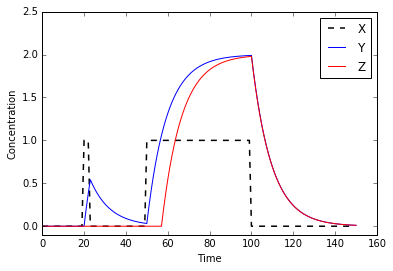

In [17]:
## Plot X, Y, and Z on the same time scale

nsteps = 150
short_pulse = pulse(20, 23, nsteps)  # 5 sec pulse
long_pulse = pulse(50, 100, nsteps)  # 50 sec pulse
X = short_pulse + long_pulse

# setup parameters for Y and Z
Y = [0]
betay, alphay = 0.2, 0.1
Kxy = 0.5

Z = [0]
betaz, alphaz = 0.2, 0.1
Kxz = 0.5
Kyz = 1

for i in range(nsteps):
    xnow = X[i]
    ynow, znow = Y[-1], Z[-1]
    
    ynew = ynow + dY(betay, Kxy, alphay, xnow, ynow)
    znew = znow + dZ(betaz, Kxz, Kyz, alphaz, xnow, ynow, znow)
    
    Y.append(ynew)
    Z.append(znew)
    

plot(X, 'k--', label='X', linewidth=1.5)
plot(Y, 'b', label='Y')
plot(Z, 'r', label='Z')
ylim(-0.1, 2.5)
xlabel("Time")
ylabel("Concentration")
legend()
pass

<h3> <font color='firebrick'>Questions</font> </h3>

1. How do the dynamics of $Y$ and $Z$ differ in the simulation above?

2. Try varying the length of the first (short) pulse?  How does changing the length of the pulse affect the dynamics of $Y$ and $Z$?

# Performance of the Coherent FFL under noisy inputs

Let's further explore the behavior of the coherent FFL defined given noisy inputs.  As before we're going to define an input signal, $X$, that has a short and long pulse, but now we're going to pollute $X$ with random noise.

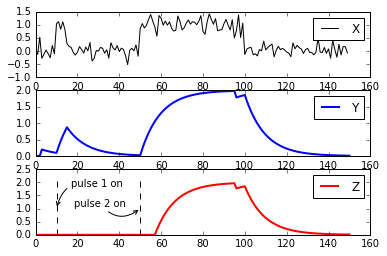

In [74]:
nsteps = 150

p1start = 10
p1duration = 5

p2start = 50
p2duration = 50

short_pulse = pulse(p1start, p1start + p1duration, nsteps)  # short pulse
long_pulse = pulse(p2start, p2start + p2duration, nsteps)  # long pulse
X = short_pulse + long_pulse 

# change this `scale` argument to increase/decrease noise
noise = np.random.normal(loc=0, scale=0.2, size=nsteps) # mean=0, sd=0.2

X = X + noise

# setup parameters for Y and Z
Y = [0]
betay, alphay = 0.2, 0.1
Kxy = 0.5

Z = [0]
betaz, alphaz = 0.2, 0.1
Kxz = 0.5
Kyz = 1

for i in range(nsteps):
    xnow = X[i]
    ynow, znow = Y[-1], Z[-1]
    ynew = ynow + dY(betay, Kxy, alphay, xnow, ynow)
    znew = znow + dZ(betaz, Kxz, Kyz, alphaz, xnow, ynow, znow)
    Y.append(ynew)
    Z.append(znew)

# draw each trace as a subfigure
# subfigures stacked in a vertical grid

subplot2grid((3,1),(0,0))
plot(X, 'k', label='X', linewidth=1)
legend()

subplot2grid((3,1),(1,0))
plot(Y, 'b', label='Y', linewidth=2)
legend()

subplot2grid((3,1),(2,0))
plot(Z, 'r', label='Z', linewidth=2)

vlines(p1start, min(Z),max(Z)*1.1,color='black',linestyle='dashed')
annotate("pulse 1 on", xy=(p1start,1),xytext=(40,20),
         textcoords='offset points',
         horizontalalignment="center",
         verticalalignment="bottom",
         arrowprops=dict(arrowstyle="->",color='black',
                         connectionstyle='arc3,rad=0.5',
                         linewidth=1))
vlines(p2start, min(Z),max(Z)*1.1,color='black',linestyle='dashed')
annotate("pulse 2 on", xy=(p2start,1),xytext=(-40,0),
         textcoords='offset points',
         horizontalalignment="center",
         verticalalignment="bottom",
         arrowprops=dict(arrowstyle="->",color='black',
                         connectionstyle='arc3,rad=0.5',
                         linewidth=1))
legend()
pass

### To Explore

In the code cell above, try changing the duration of the first pulse and the `scale` of the noise (see comments in code) to get a sense of how good a filter the FFL is.  Is there a bias to the filtering with respect to turn on versus turn of?


### OPTIONAL: Dynamics of Y and Z in the Coherent FFL

As before we can solve for Y as a function of time and calculate what its steady state value will be:

$$
Y(t) = Y_{st}(1-e^{-\alpha_{y}t})
$$

and 

$$
Y_{st}=\frac{\beta_y}{\alpha_y}
$$

#### How about $Z$? 

Since $Z$ is governed by an AND function it needs both $X$ and $Y$ to be above their respective thresholds, $K_{xz}$ and $K_{yz}$. For the sake of simplicity let's assume that both $Y$ and $Z$ have the same threshold with respect to $X$, i.e. $K_{xy} = K_{xz}$. This allows us just to consider how long it takes for $Y$ to reach the threshold value $K_{yz}$. Given this we can calculate the delay before $Z$ turns on, $T_{\mathrm{on}}$ as follows.

$$
Y(T_{\mathrm{on}}) = Y_{st}(1-e^{-\alpha_y T_{\mathrm{on}}}) = K_{yz}
$$

and solving for $T_{\mathrm{on}}$ we find:

$$
T_{\mathrm{on}} = \frac{1}{\alpha_y} \log\left[\frac{1}{(1-K_{yz}/Y_{st})}\right]
$$

Thus we see that the delay before $Z$ turns on is a function of the degradation rate of $Y$ and the ratio between $Y_{st}$ and $K_{yz}$.  

#### Exploring the Parameter space of $Z$'s turn-on time

From the above formula, we see that there are two parameters that affect the turn-on time of $Z$ -- $\alpha_y$ (the scaling factor for the decay rate of $Y$)  and the compound parameter $K_{yz}/Y_{st}$ (the threshold concentration where $Y$ activate $Z$ relative to the steady state of $Y$).  To explore the two-dimensional parameter space of $Z's$ $T_on$ we can create a contour plot.

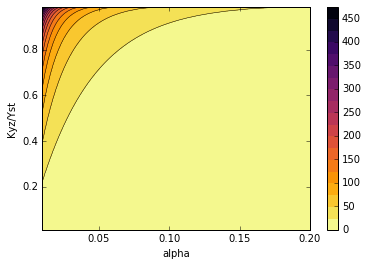

In [38]:
def Ton(alpha, KYratio):
    return (1.0/alpha) * log(1.0/(1.0-KYratio))

## Create a contour plot for a range of alpha and Kyz/Yst
x = alpha = linspace(0.01, 0.2, 100)
y = KYratio = linspace(0.01, 0.99, 100)
X,Y = meshgrid(x, y)

Z = Ton(X,Y)
levels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())

im = contourf(X,Y,Z, cmap=cm.inferno_r, levels=levels)
contour(X, Y, Z, levels,
                  colors=('k',),
                  linewidths=(0.5,))
colorbar(im)
xlabel('alpha')
ylabel("Kyz/Yst")
pass

### Type 1 Coherent FFLs can act as a Sign-Sensitive Delays

As discussed in the article by Shen-Orr et al. a feed forward loop of the type we've just discussed can act as a type of filter -- a sign-sensitive delay that keeps $Z$ from firing in response to transient noisy signals from $X$, but shuts down $Z$ immediately once the signal from $X$ is removed. 

# An Incoherent FFL

Consider the FFL illustrated in the figure below.  

![incoherent ffl](http://people.duke.edu/~pm21/incoherent-ffl.png)

In this incoherent FFL, the logic function that regulates $Z$ is "X AND NOT Y".  That is $Z$ turns on once $X$ is above a given threshold, but only stays on fully as long as $Y$ is below another threshold. Again for simplicity we assume $K_{xy} = K_{yz}$. 

### Dynamics of Y

As before, the dynamics of $Y$ are described by:

$$
\frac{dY}{dt} = \beta_y\ \Theta(X > K_{xy}) - \alpha_{y}Y
$$

and   

$$
Y(t) = Y_{st}(1-e^{-\alpha_{y}t})
$$



### Dynamics of Z

To describe $Z$ we consider two phases - 1) while $Y < K_{yz}$ and 2) while $Y > K_{yz}$. 

#### Z, Phase 1

For the first phase:

$$
\frac{dZ}{dt} = \beta_z\ \Theta(X > K_{xz}) - \alpha_{z}Z
$$

and

$$
Z(t) = Z_{m}(1-e^{-\alpha_{z}t})
$$

As we did in the case of the coherent FFL, we can calculate the time until $Y$ reaches the treshold $K_{yz}$. We'll call this $T_{\mathrm{rep}}$ and it is the same formula we found for $T_{\mathrm{on}}$ previously.

$$
T_{\mathrm{rep}} = \frac{1}{\alpha_y \log[\frac{1}{1-K_{yz}/Y_{st}}]}
$$

#### Z, Phase 2

After a delay, $T_{\mathrm{rep}}$, $Y$ starts to repress the transcription of $Z$ and $Z$ decays to a new lower steady state, $Z_{st} = \beta_{z}^{'}/\alpha$. The value of  $\beta_{z}^{'}$ depends on how leaky the repression of $Z$ is by $Y$.  


The dynamics of $Z$ in Phase 2 is given by:

$$
Z(t) = Z_{st} + (Z_0 - Z_{st})e^{-\alpha_{z}(t-T_{\mathrm{rep}})}
$$

where
$$
Z_0 = Z_{m}(1-e^{-\alpha_{z}T_{\mathrm{rep}}})
$$


### Combining the two phases of Z

We can combine the two phases of $Z$ into a single function:

$$
f(X,Y) = \beta_z\Theta(X > K_{xz} \land Y < K_{yz}) + \beta_{z}^{'}\Theta(Y \geq K_{yz}) - \alpha_z Z
$$

In [79]:
## Write a Python function that represents dZ/dt for the Incoherent FFL
## our dY function previously defined stays the same

def dZ_incoh(B1,B2,Kx,Ky,a,X,Y,Z):
    pass # define the function here

def dZ_incoh(B1,B2,Kx,Ky,a,X,Y,Z):
    theta = 0
    B = 0
    if (X > Kx) and (Y < Ky):
        theta = 1
        B = B1
    elif (X > Kx) and (Y >= Ky):
        theta = 1
        B = B2
    return B * theta - a * Z


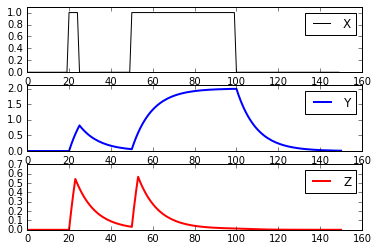

In [85]:
## Write your simulation here

nsteps = 150
short_pulse = pulse(20, 25, nsteps)  # 5 sec pulse
long_pulse = pulse(50, 100, nsteps)  # 50 sec pulse
X = short_pulse + long_pulse

# setup parameters for Y and Z
Y = [0]
betay, alphay = 0.2, 0.1
Kxy = 0.5

Z = [0]
betaz1, betaz2 = 0.2, 0.001
alphaz = 0.1
Kxz = 0.5
Kyz = 0.5

for i in range(nsteps):
    xnow = X[i]
    ynow, znow = Y[-1], Z[-1]
    
    ynew = ynow + dY(betay, Kxy, alphay, xnow, ynow)
    znew = znow + dZ_incoh(betaz1, betaz2, Kxz, Kyz, alphaz, xnow, ynow, znow)
    
    Y.append(ynew)
    Z.append(znew)
    

# draw each trace as a subfigure
# subfigures stacked in a vertical grid

subplot2grid((3,1),(0,0))
plot(X, 'k', label='X', linewidth=1)
legend()
ylim(0,1.1)

subplot2grid((3,1),(1,0))
plot(Y, 'b', label='Y', linewidth=2)
legend()
ylim(0,2.1)

subplot2grid((3,1),(2,0))
plot(Z, 'r', label='Z', linewidth=2)
legend()
ylim(0,0.7)
pass

### Dynamics of the Incoherent FFL

Note that the stimulus amount of $Z$ in the system initially increases, but then decreases to a lower steady even when the initial stimulus persists. This system thus generates **pulse-like dynamics to a persistent signal**. How pulse-like the signal is depends on the ratio of $\beta_z$ to $\beta_{z}^{'}$. We define the repression factor, $F$, as follows:

$$
F = \frac{\beta_z}{\beta_{z}^{'}} = \frac{Z_m}{Z_{st}}
$$


<h1> <font color='firebrick'> Modeling Challenge </font> </h1>

See if you can come up with a reasonably small set of coupled ODEs for one of the signaling or regulatory networks you've learned about in this mini-term.
